In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'0.24.2'

## Data

In [3]:
# The data set contains the top 1000 baby names in the US
# for each year from 1880 until 2008
names_df = pd.read_csv('data/baby-names2.csv')
names_df.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

## Explore the data

In [4]:
# Get popular names for 1969
names_df[names_df.year == 1969].tail()

        year       name      prop   sex soundex
218995  1969   Josefina  0.000067  girl    J215
218996  1969   Marisela  0.000067  girl    M624
218997  1969     Sallie  0.000067  girl    S400
218998  1969      Suzan  0.000067  girl    S250
218999  1969  Francisca  0.000066  girl    F652

In [5]:
# Separate the boys from the girls
boys_df = names_df[names_df.sex == 'boy']
girls_df = names_df[names_df.sex == 'girl']
girls_df.head()

        year       name      prop   sex soundex
129000  1880       Mary  0.072381  girl    M600
129001  1880       Anna  0.026678  girl    A500
129002  1880       Emma  0.020521  girl    E500
129003  1880  Elizabeth  0.019865  girl    E421
129004  1880     Minnie  0.017888  girl    M500

In [6]:
# Get the number of boy baby name rows per year (showing first 5) 
boys_df.groupby('year').size().head()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
dtype: int64

In [7]:
# Get the hierarchical index of baby name rows per year 
# grouped by gender for the year 1969
names_df.groupby(['year', 'sex']).size().ix[1969]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


sex
boy     1000
girl    1000
dtype: int64

In [8]:
# Get the most popular boy name for the year 1969
rowid = boys_df[boys_df.year == 1969].prop.idxmax()
boys_df.ix[rowid]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


year           1969
name        Michael
prop       0.046564
sex             boy
soundex        M240
Name: 89000, dtype: object

In [9]:
# Apply the get_max_proportion to the whole dataframe
# to get the most popular name for each year (showing first 5)
def get_max_proportion(group):
    return group.ix[group.prop.idxmax()]
    
popular_boys_df = boys_df.groupby('year').apply(get_max_proportion)
popular_boys_df.tail()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


      year   name      prop  sex soundex
year                                    
2004  2004  Jacob  0.013196  boy    J210
2005  2005  Jacob  0.012148  boy    J210
2006  2006  Jacob  0.011331  boy    J210
2007  2007  Jacob  0.010948  boy    J210
2008  2008  Jacob  0.010355  boy    J210

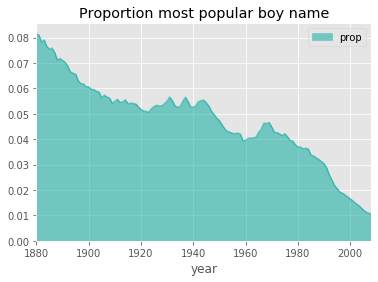

In [11]:
# Plot the proportion of the most popular boy name per year
# Maybe showing more diversity in chosen boy names over time
popular_boys_df.prop.plot(legend=True, title='Proportion most popular boy name', 
                          kind='area', color='#00A99D', alpha=.5)

In [12]:
# Set the index to a name/year combination
boys_index_df = boys_df.set_index(['name', 'year'])
boys_index_df.head()

                  prop  sex soundex
name    year                       
John    1880  0.081541  boy    J500
William 1880  0.080511  boy    W450
James   1880  0.050057  boy    J520
Charles 1880  0.045167  boy    C642
George  1880  0.043292  boy    G620

In [15]:
boys_index_df.ix['Leon']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


          prop  sex soundex
year                       
1880  0.000997  boy    L500
1881  0.001117  boy    L500
1882  0.001073  boy    L500
1883  0.001245  boy    L500
1884  0.001222  boy    L500
1885  0.001259  boy    L500
1886  0.001193  boy    L500
1887  0.001345  boy    L500
1888  0.001509  boy    L500
1889  0.001546  boy    L500
1890  0.001646  boy    L500
1891  0.001373  boy    L500
1892  0.001422  boy    L500
1893  0.001743  boy    L500
1894  0.001889  boy    L500
1895  0.001729  boy    L500
1896  0.001820  boy    L500
1897  0.001878  boy    L500
1898  0.001907  boy    L500
1899  0.001632  boy    L500
1900  0.001916  boy    L500
1901  0.001799  boy    L500
1902  0.001868  boy    L500
1903  0.002227  boy    L500
1904  0.001740  boy    L500
1905  0.001913  boy    L500
1906  0.001825  boy    L500
1907  0.002043  boy    L500
1908  0.001966  boy    L500
1909  0.002132  boy    L500
...        ...  ...     ...
1979  0.000507  boy    L500
1980  0.000488  boy    L500
1981  0.000467  boy 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


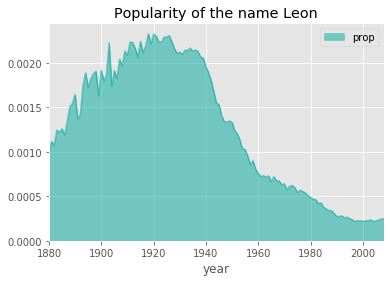

In [16]:
# Narcissistic query for the popularity of my first name
leon_popularity = boys_index_df.ix['Leon']
leon_popularity.prop.plot(kind='area', color='#00A99D', alpha=.5, 
                          legend=True, title='Popularity of the name Leon')

In [17]:
# My name was the most popular in the year...
boys_index_df.ix['Leon'].prop.idxmax()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1918

In [18]:
# Highest boy name proportion ever...
boys_index_df.prop.idxmax()

('John', 1880)

In [19]:
# Calculate the mean proportion for each girl name in the set
# Show first 5 in descending order
mean_prop = girls_df.groupby('name')['prop'].mean()
mean_prop.order(ascending=False).head()

AttributeError: 'Series' object has no attribute 'order'

In [20]:
# Retrieve summary statistics for each year in the data set
result = girls_df.groupby('year').describe()
result.head(24)

        prop                                                              \
       count      mean       std       min       25%       50%       75%   
year                                                                       
1880  1000.0  0.000935  0.003270  0.000041  0.000061  0.000123  0.000400   
1881  1000.0  0.000933  0.003214  0.000040  0.000061  0.000121  0.000407   
1882  1000.0  0.000931  0.003211  0.000043  0.000061  0.000121  0.000406   
1883  1000.0  0.000933  0.003131  0.000042  0.000067  0.000125  0.000433   
1884  1000.0  0.000931  0.003124  0.000044  0.000065  0.000128  0.000443   
1885  1000.0  0.000930  0.003058  0.000042  0.000063  0.000127  0.000465   
1886  1000.0  0.000930  0.003038  0.000039  0.000065  0.000130  0.000449   
1887  1000.0  0.000928  0.003011  0.000045  0.000064  0.000129  0.000452   
1888  1000.0  0.000928  0.002958  0.000042  0.000069  0.000137  0.000455   
1889  1000.0  0.000928  0.002937  0.000042  0.000069  0.000132  0.000461   
1890  1000.0

## Calculating Baby Name Diversity

In [21]:
# Get a single year of girl names and sort by proportion descending
girls_df_1972 = girls_df[girls_df.year == 1972]
girls_df_1972_sorted = girls_df_1972.sort_index(by='prop', ascending=False)
girls_df_1972_sorted.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


        year      name      prop   sex soundex
221000  1972  Jennifer  0.039447  girl    J516
221001  1972  Michelle  0.018157  girl    M240
221002  1972      Lisa  0.017086  girl    L200
221003  1972  Kimberly  0.016310  girl    K516
221004  1972       Amy  0.016042  girl    A500

In [17]:
# What is the proportion of this top 1000 girl names of the total names?
girls_df_1972_sorted.prop.cumsum().max()

0.84374700000000091

In [18]:
# Where is the 50% crossover point for cumulative sum
girls_df_1972_cumsum = girls_df_1972_sorted.prop.cumsum()
crossover = girls_df_1972_cumsum.searchsorted(.5)
girls_df_1972_cumsum[(crossover[0]-2):crossover[0]+3]

221088    0.496577
221089    0.498685
221090    0.500773
221091    0.502820
221092    0.504862
Name: prop, dtype: float64

In [19]:
# The crossover can be seen as a meassure of diversity
# It's the number of names accounting for 50% of all the names given
# So the higher, the more creative name giving
crossover[0]

90

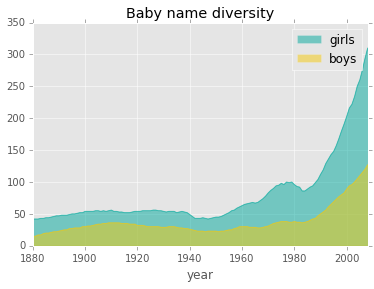

In [20]:
# Let's calculate this crossover point for boys and girls per year
def get_crossover(group, quantile):
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]

q = .5

girls_crossover = girls_df.groupby('year').apply(get_crossover, quantile=q)
girls_crossover.name = 'girls'

boys_crossover = boys_df.groupby('year').apply(get_crossover, quantile=q)
boys_crossover.name = 'boys'

# Plot the crossover counts over time
girls_crossover.plot(kind='area', color='#00A99D', alpha=.5, legend=True)
boys_crossover.plot(title='Baby name diversity', kind='area', 
                    color='#F5CA0C', alpha=.5, legend=True)